In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk
from sklearn import metrics 
from skimage import morphology, measure
from tqdm import tqdm

In [128]:
def tumor_splitser(segmentation, remove_fist_component = True):
    '''
    takes in segmentation of multiple conected components and splits them over images with only one component 
    takes np.array as input
    returns np.array dims=(z,y,x,components)
    '''
    if isinstance(segmentation, sitk.Image):
        segmentation = sitk.GetArrayFromImage(segmentation)
    
    segmentation = measure.label(segmentation, connectivity=2)
    # print('max',np.max(segmentation))
    out = np.empty((segmentation.shape[0], segmentation.shape[1], segmentation.shape[2], np.max(segmentation)),dtype= np.bool_)

    
    for i in range(1, np.max(segmentation)+1):
        # print('i',i)
        split = np.zeros_like(segmentation, dtype = np.bool_)
        split[np.where(segmentation == i)] = True
        out[:,:,:,i-1] = split
        
    return out

def run_dice(segmentation_folder, gt_folder, observer = 'RAD'):
    '''
    Runs dice score over all components in segmentation and gt
    returns list of non-zero dice scores
    observers: ['RAD', 'STUD1', 'STUD2', 'CNN', 'PhD']
    '''
    
    dice_scores = []
    
    for i in tqdm((os.listdir(segmentation_folder))):
        
        if i.endswith('.nii.gz'):
            # load images
            segmentation = sitk.ReadImage(os.path.join(segmentation_folder, i))
            # split connected components
            segmentation = tumor_splitser(segmentation)
            scan_number = (i[5:8]) # get scan number from file name

            # loop over observers
            for n in (os.listdir(gt_folder + 'CRLM-' + scan_number + '_CT/1/NIFTI/')):
                
                if n.endswith(observer +'.nii.gz'):

                    gt = sitk.ReadImage(os.path.join(gt_folder + 'CRLM-' + scan_number + '_CT/1/NIFTI/', n))
                    gt = sitk.GetArrayFromImage(gt)
                    
                    dice = 0 # initialize dice score
                    for j in range(1,segmentation.shape[3]):    
                        
                        new_dice = metrics.f1_score(segmentation[:,:,:,j].flatten(), gt.flatten())
                        
                        # only save the highest dice score
                        if new_dice > dice:
                            dice = new_dice
                        
                    dice_scores.append(dice)
                    
    return dice_scores

data_root = '//storage.erasmusmc.nl/m/MyDocs/092335/My Documents/Desktop/Data' 

segmentation_folder = data_root + '/WORC_CRLM/Pure_CRLM_data/predictions/second_try/'
gt_folder = data_root + '/WORC_CRLM/Pure_CRLM_data/Pure_CRLM/'
root = data_root + '/WORC_CRLM/Pure_CRLM_data/nnUNet_dice_reults/second_try/'

for observer in (['RAD', 'STUD1', 'STUD2', 'CNN', 'PhD']):

    dice_scores = run_dice(segmentation_folder, gt_folder, observer = observer)
    print('Mean dice score for observer ' + observer + ' is: ', np.mean(dice_scores))
    print(dice_scores)
    np.save(root + 'gt_'+observer+'_dice.npy', dice_scores)

100%|██████████| 70/70 [1:11:58<00:00, 61.70s/it] 


Mean dice score for observer RAD is:  0.5955629855756237
[0.7569490771625529, 0.7567156614292956, 0.7252665509546243, 0.9023592239572772, 0.7360157016683023, 0.6462948815889993, 0.7190020790020789, 0.6733391040900238, 0.49511400651465803, 0.7024052181002853, 0.5504490227152667, 0.5843373493975903, 0.5719532349880639, 0.7423981640849111, 0.5962815405046481, 0.8206388738494856, 0.8595543018335684, 0.5456226880394575, 0.5390683137371632, 0.8098194130925508, 0.5702127659574469, 0.6988893459481695, 0.8645112274185379, 0.7066694543173742, 0.5779848471653749, 0.7175894827751655, 0.39831059129304747, 0.602373887240356, 0.4573415351698315, 0.5862862402208928, 0.747677261613692, 0.5933831376734258, 0.7687615174429687, 0.853278924376782, 0.5131578947368421, 0.5394147113103085, 0.8363820452244347, 0.854575408117418, 0.5368276807125728, 0.5819314641744548, 0.6405449150256273, 0.7242011524358303, 0.6820083682008369, 0.6658130601792575, 0.778057002758198, 0.37337413925019125, 0.11249528123820308, 0.8

100%|██████████| 70/70 [1:12:42<00:00, 62.32s/it] 


Mean dice score for observer STUD1 is:  0.761360944020595
[0.6649937264742787, 0.8893676613163847, 0.842097680449503, 0.9403728798677068, 0.8318501170960186, 0.7483530961791831, 0.8898612326540818, 0.8667272577047013, 0.6728476821192053, 0.8391812865497076, 0.8299096138044371, 0.8429458740017748, 0.9064309020103146, 0.8692862870890136, 0.6666666666666667, 0.9406957770380524, 0.9520912742720005, 0.8336162988115451, 0.7967210094869669, 0.8345266507557677, 0.7363636363636363, 0.8998003992015968, 0.830230049072495, 0.8977469670710573, 0.802179904785768, 0.9291682735570125, 0.6371967654986522, 0.7685589519650654, 0.7814793901750424, 0.6919917864476386, 0.3715268589573961, 0.7090163934426229, 0.927277199311306, 0.9143890048929473, 0.8006872852233677, 0.857399910031489, 0.9320445111375285, 0.9101375445746307, 0.8531784446595676, 0.8166612003935716, 0.8843904633378318, 0.834257032312036, 0.911596825838786, 0.8824194460146975, 0.8759160980540814, 0.9066666666666666, 0.5821782178217821, 0.757408

100%|██████████| 70/70 [1:22:52<00:00, 71.04s/it]   


Mean dice score for observer STUD2 is:  0.7747897613904572
[0.9260190654424234, 0.8693377968406737, 0.9003603321322263, 0.939224868732588, 0.8663617886178862, 0.8197969543147209, 0.9293829360659389, 0.883534732003855, 0.6127659574468085, 0.7308970099667774, 0.8233387358184765, 0.8414133114215284, 0.9119848213344578, 0.8467801628423391, 0.7159716758457908, 0.9289034799737361, 0.9436843613999426, 0.7723823975720789, 0.7202089454782893, 0.8294185598767809, 0.7458333333333332, 0.8893967093235833, 0.8755394770246256, 0.9110036963321013, 0.8482555695670448, 0.6873972949058273, 0.6783161239078633, 0.8067226890756303, 0.904297994269341, 0.8413309982486865, 0.8457978802806388, 0.6258090614886732, 0.9222485110549073, 0.9115437682048138, 0.9183673469387754, 0.8425720620842572, 0.929139301762876, 0.8953307588143838, 0.880751782242385, 0.7273373622467116, 0.9185596666997322, 0.8803310531205134, 0.9111545988258317, 0.8958889482114255, 0.8908202963330849, 0.38197424892703863, 0.7559055118110237, 0.92

100%|██████████| 70/70 [1:12:14<00:00, 61.92s/it] 


Mean dice score for observer CNN is:  0.7456103796883775
[0.908121634118479, 0.7985874967303166, 0.8033587996420952, 0.9101299446052877, 0.8822899946495452, 0.803347280334728, 0.9327146171693735, 0.872479795831561, 0.6959847036328872, 0.8887711864406779, 0.346031746031746, 0.8669902912621359, 0.8116161616161617, 0.8986964941183271, 0.7191011235955057, 0.6311381483603519, 0.6311381483603519, 0.6601356443104748, 0.8439701616245338, 0.8048582995951417, 0.5702127659574469, 0.9434761675493499, 0.8873001470542223, 0.83785664578984, 0.8423935369026426, 0.8852263227039294, 0.39831059129304747, 0.7958656330749353, 0.7851186658114176, 0.897967563128721, 0.9101331984488282, 0.19967620075553158, 0.9484352197178532, 0.9359671378518787, 0.7299035369774919, 0.886015325670498, 0.9446200092492677, 0.7666132600900282, 0.8081111528351483, 0.774091627172196, 0.8873506754493692, 0.9278930706999649, 0.9127063531765883, 0.9046467902229386, 0.9107443583698215, 0.475, 0.11249528123820308, 0.9440075793462814, 0

100%|██████████| 70/70 [1:12:29<00:00, 62.14s/it] 

Mean dice score for observer PhD is:  0.7188587785721777
[0.8496998066551338, 0.8388573703593112, 0.9112991694091835, 0.9227915289071575, 0.6964083175803403, 0.7355021216407355, 0.7946253229974161, 0.7926655348047538, 0.6277056277056277, 0.8204267561735794, 0.8232445520581114, 0.7848101265822784, 0.9055837563451776, 0.8467353951890034, 0.5346744309158284, 0.8760185625022837, 0.9109060730326108, 0.7208604302151076, 0.7403673028447965, 0.7119331137572839, 0.55930359085963, 0.835373924553276, 0.8702416940070775, 0.6879868798687988, 0.7177274361740381, 0.7014976563393163, 0.6646010844306739, 0.6944971537001897, 0.8723175965665236, 0.7677811550151976, 0.7984430529700457, 0.8322075114833829, 0.9227995410588429, 0.8961545277334751, 0.6153846153846154, 0.8065439672801636, 0.8888188275439995, 0.8215726432073481, 0.6954860281824695, 0.7538635506973237, 0.8578932010504815, 0.642973665812165, 0.7429762732055991, 0.779870330348873, 0.8537114744610043, 0.4859437751004016, 0.5835010060362172, 0.92434

In [129]:
data_root = '//storage.erasmusmc.nl/m/MyDocs/092335/My Documents/Desktop/Data' 
gt_root = data_root + '/nnUnet/pure_CRLM/task502_CRLM/'

segmentation_folder = '//storage.erasmusmc.nl/m/MyDocs/092335/My Documents/Desktop/Data/WORC_CRLM/Pure_CRLM_data/predictions' 

gt_RAD  = data_root + '/nnUnet/pure_CRLM/task502_CRLM/labelsTr/' #(RAD)
gt_STUD1 = gt_root + 'labelsTr_STUD1/'
gt_STUD2 = gt_root + 'labelsTr_STUD2/'
gt_CNN  = gt_root + 'labelsTr_CNN/'
gt_PhD  = gt_root + 'labelsTr_PhD/'

# gt_RAD_dice   = run_dice(segmentation_folder, gt_RAD)
# gt_STUD1_dice = run_dice(segmentation_folder, gt_STUD1)
# gt_STUD2_dice = run_dice(segmentation_folder, gt_STUD2)
# gt_CNN_dice = run_dice(segmentation_folder,   gt_CNN)
# gt_PhD_dice = run_dice(segmentation_folder,   gt_PhD)

In [130]:
# root = data_root + '/WORC_CRLM/Pure_CRLM_data/nnUNet_dice_reults/'

# np.save(root + 'dice_scores.npy', gt_RAD_dice)
# np.save(root + 'gt_STUD1_dice.npy', gt_STUD1_dice)
# np.save(root + 'gt_STUD2_dice.npy', gt_STUD2_dice)
# np.save(root + 'gt_CNN_dice.npy', gt_CNN_dice)
# np.save(root + 'gt_PhD_dice.npy', gt_PhD_dice)

In [131]:
root = data_root + '/WORC_CRLM/Pure_CRLM_data/nnUNet_dice_reults/second_try/'
print(os.listdir(root))
gt_RAD_dice = np.load(root + 'gt_RAD_dice.npy')
gt_STUD1_dice = np.load(root + 'gt_STUD1_dice.npy')
gt_STUD2_dice = np.load(root + 'gt_STUD2_dice.npy')
gt_CNN_dice = np.load(root + 'gt_CNN_dice.npy')
gt_PhD_dice = np.load(root + 'gt_PhD_dice.npy')


['gt_CNN_dice.npy', 'gt_PhD_dice.npy', 'gt_RAD_dice.npy', 'gt_STUD1_dice.npy', 'gt_STUD2_dice.npy']


In [132]:
print('gt_RAD_dice', np.mean(gt_RAD_dice))

gt_RAD_dice 0.5955629855756237


(82,)
RAD 0.61 ( 0.18 )
(82,)
STUD1 0.78 ( 0.16 )
(82,)
STUD2 0.79 ( 0.15 )
(83,)
CNN 0.75 ( 0.2 )
(82,)
PhD 0.74 ( 0.16 )


Text(0.5, 1.0, 'Dice similarity score for different observers')

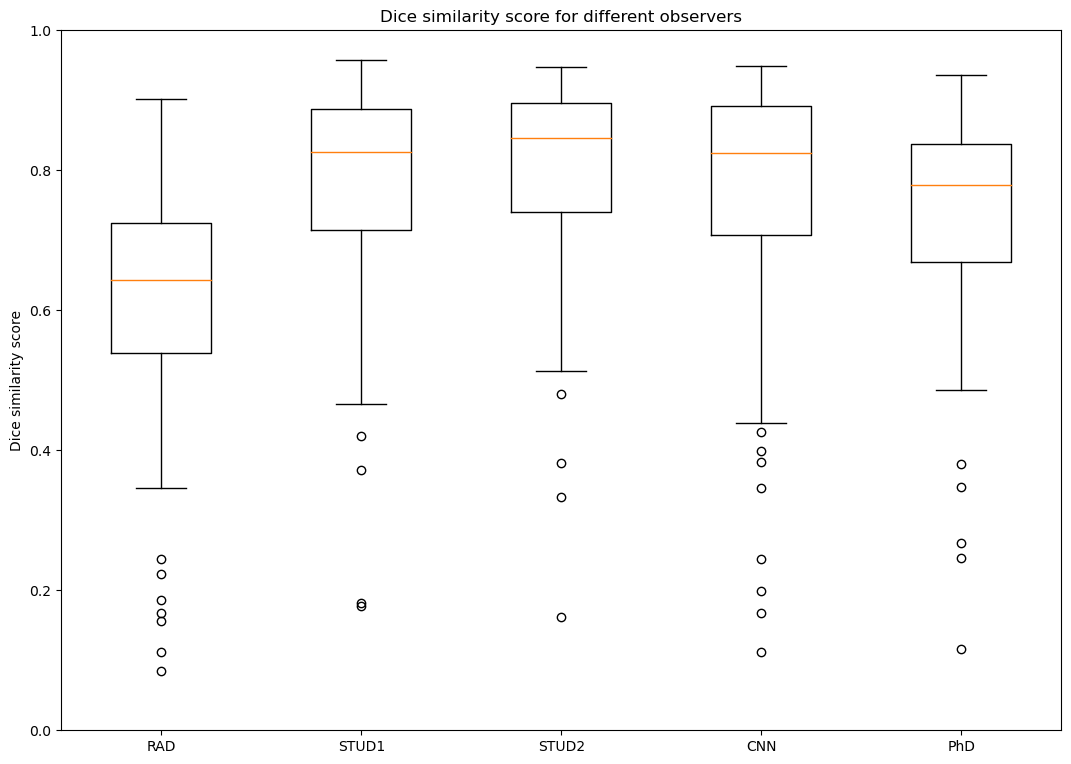

In [149]:
data = [gt_RAD_dice, gt_STUD1_dice, gt_STUD2_dice, gt_CNN_dice, gt_PhD_dice]
names =['RAD', 'STUD1', 'STUD2', 'CNN', 'PhD']
for i , name in enumerate(data):
    new  = np.delete(name, np.where(name<0.01))
    data[i] = new
    print(data[i].shape)
    print(names[i], np.round(np.mean(data[i]),2), '(',np.round(np.std(data[i]),2),')')
    # print(name, np.mean(data[i]))
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(['RAD', 'STUD1', 'STUD2', 'CNN', 'PhD'])
ax.set_ylim(0,1)
ax.set_ylabel('Dice similarity score')
ax.set_title('Dice similarity score for different observers')